In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import joblib

In [2]:
df=joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/train_dataset.pkl')

In [3]:
df.shape

(9887, 22)

In [4]:
df.loc[df['BMI'] < 18.5, 'BMI']= 1
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9) ,'BMI']= 2 # Normal
df.loc[(df['BMI'] >= 25) & (df['BMI'] <= 29.9),'BMI']= 3 # Overweight
df.loc[(df['BMI'] > 30),'BMI']= 4 # Obese

In [5]:
df.head()

,sedentary_q,sodium_q,potassium_q,caffeine_q,gender,age,active_duty,pulse_regularity,smoke,alcohol,...,salt_add_at_table,salt_add_in_preparation,HBP,BMI,race_mexican_american,race_other_hispanic,race_white,race_black,race_multi_racial,race_asian
14514,2,3.0,3.0,2.0,0,61.0,1,0.0,0.0,0.0,...,1.0,3.0,0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
14515,2,5.0,2.0,2.0,0,22.0,0,0.0,0.0,0.0,...,2.0,3.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
14517,1,1.0,1.0,3.0,0,64.0,1,0.0,1.0,0.0,...,3.0,4.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
14518,2,2.0,5.0,2.0,0,70.0,1,0.0,0.0,0.0,...,0.0,2.0,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
14523,1,2.0,2.0,1.0,0,26.0,1,1.0,0.0,0.0,...,1.0,2.0,0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
X = df[['age','BMI']]
y = df['HBP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(X_train,y_train)

print('weights: ')
print(lg.coef_)
print('Intercept: ')
print(lg.intercept_)

weights: 
[[0.06630085 0.5311429 ]]
Intercept: 
[-4.63133019]


In [8]:
#Predict training set:
y_pred = lg.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[668 292]
 [239 779]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       960
           1       0.73      0.77      0.75      1018

    accuracy                           0.73      1978
   macro avg       0.73      0.73      0.73      1978
weighted avg       0.73      0.73      0.73      1978



In [9]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [10]:
result=pd.DataFrame()
# Sensitivity, hit rate, recall, or true positive rate
result['TPR'] = [round(TP/(TP+FN),2)]
 # Specificity or true negative rate
result['TNR'] = [round(TN/(TN+FP),2) ]
        # Fall out or false positive rate
result['FPR'] = [round(FP/(FP+TN),2)]
         # False negative rate
result['FNR'] = [round(FN/(TP+FN),2)]

lg_probs = lg.predict_proba(X_test)
        # keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
result['AUC'] = [round(roc_auc_score(y_test, lg_probs),2)]
result

,TPR,TNR,FPR,FNR,AUC
0,0.77,0.7,0.3,0.23,0.8


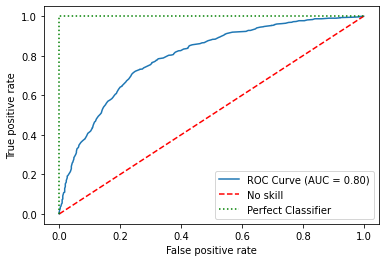

In [11]:
gbc_auc = roc_auc_score(y_test, lg_probs)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, lg_probs)
plt.plot(gbc_fpr, gbc_tpr, label='ROC Curve (AUC = %0.2f)' % (gbc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No skill')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [12]:
# case one by age
case = pd.DataFrame(
   {"BMI":[2]
   }
)
case=pd.concat([case]*60)
case.insert(0,'age',range(20,20+len(case)))

In [13]:
probs = lg.predict_proba(case)
prediction=probs[:, 1]

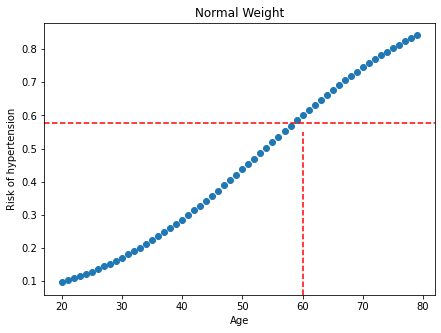

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(case['age'],prediction)
plt.axhline(y=0.5774,xmin=0, xmax=59, color='r',linestyle='--')
plt.axvline(x=60, ymin=0, ymax=0.6, color='r',linestyle='--')
plt.title("Normal Weight")
plt.xlabel("Age")
plt.ylabel("Risk of hypertension")
plt.show() 

In [15]:
# case one by age
case_new = pd.DataFrame(
   {"Age":[60],
       "BMI":[2]
   }
)

lg.predict_proba(case_new)[:, 1]

array([0.60084963])

In [16]:
# case one by age
case = pd.DataFrame(
   {"Age":[25,35,50,65,25,35,50,65,25,35,50,65,25,35,50,65],
       "BMI":[1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
   }
)
probs = lg.predict_proba(case)
prediction=probs[:, 1]

case['prediction']=prediction

In [17]:
case["BMI"].replace({1: "underweight", 2: "normal", 3:'overweight',4:"obese"}, inplace=True)

Text(0, 0.5, 'Risk of hypertension')

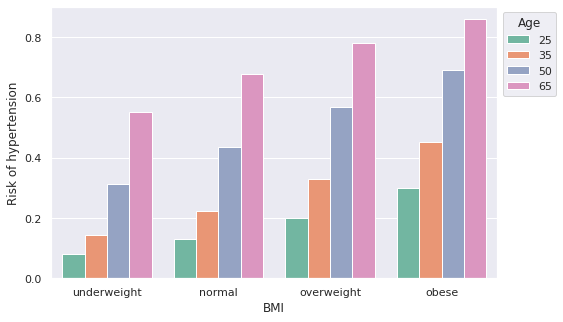

In [18]:
sns.set(color_codes=False)
plt.figure(figsize=(8,5))
#sort = results.sort_values(by='f1', ascending=False).model_name.values
ax = sns.barplot(x="BMI", y="prediction", hue='Age',data=case, palette='Set2')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Age", loc='upper left',bbox_to_anchor = (1,1))
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel("BMI")
ax.set_ylabel("Risk of hypertension")